In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## One hot encoding

In [26]:
df=pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [27]:
df.drop(['Name','Room Number'],inplace=True,axis=1)

In [28]:
df.shape

(55500, 13)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Gender              55500 non-null  object 
 2   Blood Type          55500 non-null  object 
 3   Medical Condition   55500 non-null  object 
 4   Date of Admission   55500 non-null  object 
 5   Doctor              55500 non-null  object 
 6   Hospital            55500 non-null  object 
 7   Insurance Provider  55500 non-null  object 
 8   Billing Amount      55500 non-null  float64
 9   Admission Type      55500 non-null  object 
 10  Discharge Date      55500 non-null  object 
 11  Medication          55500 non-null  object 
 12  Test Results        55500 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.5+ MB


In [30]:
df.describe()

,Age,Billing Amount
count,55500.000000,55500.000000
mean,51.539459,25539.316097
std,19.602454,14211.454431
min,13.000000,-2008.492140
25%,35.000000,13241.224652
50%,52.000000,25538.069376
75%,68.000000,37820.508436
max,89.000000,52764.276736


In [31]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


In [32]:
df.isnull().sum()

Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [33]:
numeric=df.select_dtypes(include=['float64'])
numeric

,Billing Amount
0,18856.281306
1,33643.327287
2,27955.096079
3,37909.782410
4,14238.317814
...,...
55495,2650.714952
55496,31457.797307
55497,27620.764717
55498,32451.092358


<Axes: ylabel='Count'>

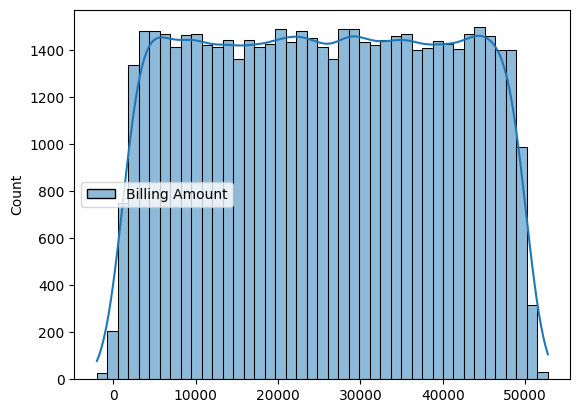

In [35]:
sns.histplot(numeric,kde=True)

In [36]:
def outlier_removal(data):
    outlier_indices={}

    for col in df.select_dtypes(include=[np.number]).columns:
        q1=np.percentile(df['Billing Amount'],25,method='midpoint')
        q3=np.percentile(df['Billing Amount'],75,method='midpoint')
        iqr=q3-q1
        lower=q1-(1.5*iqr)
        upper=q3+(1.5*iqr)

        outlier=df[(df[col]<lower) | (df[col]>upper)].index

        if len(outlier)>0:
            outlier_indices[col]=list(outlier)

    return outlier_indices
    

In [37]:
outliers=outlier_removal(df)
outliers

{}

<Axes: >

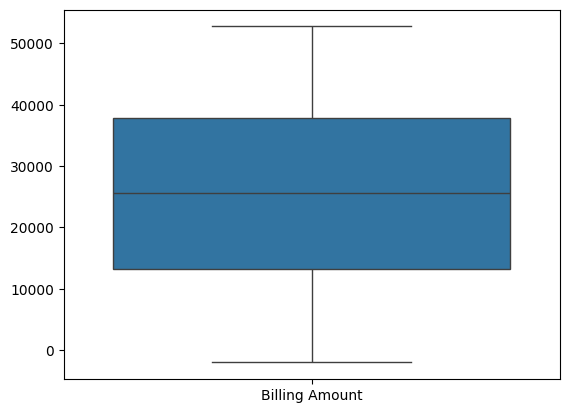

In [14]:
sns.boxplot(numeric)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Gender              55500 non-null  object 
 2   Blood Type          55500 non-null  object 
 3   Medical Condition   55500 non-null  object 
 4   Date of Admission   55500 non-null  object 
 5   Doctor              55500 non-null  object 
 6   Hospital            55500 non-null  object 
 7   Insurance Provider  55500 non-null  object 
 8   Billing Amount      55500 non-null  float64
 9   Admission Type      55500 non-null  object 
 10  Discharge Date      55500 non-null  object 
 11  Medication          55500 non-null  object 
 12  Test Results        55500 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.5+ MB


In [39]:
df.nunique()

Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [40]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [41]:
df.drop(['Date of Admission','Discharge Date'],axis=1,inplace=True)

In [42]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [43]:
df1=pd.get_dummies(df['Gender'],drop_first=True).astype(int)
df1

,Male
0,1
1,1
2,0
3,0
4,0
...,...
55495,0
55496,0
55497,0
55498,1


In [44]:
df.drop('Gender',axis=1,inplace=True)

In [46]:
df=pd.concat([df,df1],axis=1)

In [47]:
df.tail()

,Age,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Male,Male
55495,42,O+,Asthma,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,Elective,Penicillin,Abnormal,0,0
55496,61,AB-,Obesity,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,Elective,Aspirin,Normal,0,0
55497,38,B+,Hypertension,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,Urgent,Ibuprofen,Abnormal,0,0
55498,43,O-,Arthritis,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,Elective,Ibuprofen,Abnormal,1,1
55499,53,O+,Arthritis,Dennis Warren,Henry Sons and,Aetna,4010.134172,Urgent,Ibuprofen,Abnormal,0,0


In [48]:
df.isnull().sum()

Age                   0
Blood Type            0
Medical Condition     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Medication            0
Test Results          0
Male                  0
Male                  0
dtype: int64

In [50]:
cols.remove('Male')
cols.insert(2,'Male')

In [51]:
df=df[cols]
df.head()

,Age,Blood Type,Male,Male,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Male,Male
0,30,B-,1,1,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,1,1
1,62,A+,1,1,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,1,1
2,76,A-,0,0,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,Aspirin,Normal,0,0
3,28,O+,0,0,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,Ibuprofen,Abnormal,0,0
4,43,AB+,0,0,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,Penicillin,Abnormal,0,0


In [ ]:
df['Admission Type'].unique()

In [ ]:
df1=pd.get_dummies(df['Admission Type'],drop_first=False).astype(int)
df1.head()

In [ ]:
df=pd.concat([df,df1],axis=1)
df.head()

In [ ]:
df.head()

In [ ]:
df.rename(columns={'Elective':'Admsn_type_elective','Emergency':'Admsn_type_emergency','Urgent':'Admsn_type_urgent'})

In [ ]:
df.drop('Admission Type',axis=1,inplace=True)

In [ ]:
cols=list(df.columns)
cols.remove('Test Results')
cols.append('Test Results')
df=df[cols]

In [ ]:
df.head()

In [ ]:
df['Blood Type'].unique()

In [ ]:
df['Blood Type'].value_counts()

In [ ]:
df1=pd.get_dummies(df['Blood Type']).astype(int)
df1.head()

In [ ]:
df=pd.concat([df,df1],axis=1)
df.head()

In [ ]:
df.drop('Blood Type',axis=1,inplace=True)

In [ ]:
df.rename(columns={'A+':'Blood_A+','A-':'Blood_A-','AB+':'Blood_AB+','AB-':'Blood_AB-','B+':'Blood_B+','O+':'Blood_O+','O-':'Blood_O-','B-':'Blood_B-'})


In [ ]:
df['Medical Condition'].value_counts()

In [ ]:
df1=pd.get_dummies(df['Medical Condition']).astype(int)
df1.head()

In [ ]:
df=pd.concat([df,df1],axis=1)
df.head()

In [ ]:
df.drop('Medical Condition',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df['Doctor'].nunique()

In [ ]:
df.drop(['Doctor','Insurance Provider'],axis=1,inplace=True)

In [ ]:
df.head(1)

In [ ]:
df['Medication'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df['Medication']=le.fit_transform(df['Medication'])

In [ ]:
df.head()

In [ ]:
df['Test Results'].unique()

In [ ]:
x=df.drop('Test Results',axis=1)
y=df['Test Results'].map({'Normal':0,'Inconclusive':1, 'Abnormal':2})

In [ ]:
import category_encoders as ce
encoder=ce.TargetEncoder(cols=['Doctor'])
X_encoded=encoder.fit_transform(x,y)